# Image recognition using CNN on CIFAR-100 Dataset

In [1]:
from keras.datasets import cifar100
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
from keras.regularizers import Regularizer
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img,to_categorical
from keras.models import Sequential
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns

(X_train,y_train),(X_test,y_test)=cifar100.load_data()

# The CIFAR-100 dataset

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
Here is the list of classes in the CIFAR-100:

Superclass	                      ------------------->     Classes

1) aquatic mammals	              ------------------->     beaver, dolphin, otter, seal, whale

2) fish	                          ------------------->     aquarium fish, flatfish, ray, shark, trout

3) flowers	                      ------------------->     orchids, poppies, roses, sunflowers, tulips

4) food containers	              ------------------->     bottles, bowls, cans, cups, plates

5) fruit and vegetables	          ------------------->     apples, mushrooms, oranges, pears, sweet peppers

6) household electrical devices	  ------------------->     clock, computer keyboard, lamp, telephone, television

7) household furniture	          ------------------->     bed, chair, couch, table, wardrobe

8) insects	                      ------------------->     bee, beetle, butterfly, caterpillar, cockroach

9) large carnivores	              ------------------->     bear, leopard, lion, tiger, wolf

10) large man-made outdoor things ------------------->     bridge, castle, house, road, skyscraper

11) large natural outdoor scenes  ------------------->     cloud, forest, mountain, plain, sea

12) large omnivores and herbivores ------------------->    camel, cattle, chimpanzee, elephant, kangaroo

13) medium-sized mammals	------------------->           fox, porcupine, possum, raccoon, skunk

14) non-insect invertebrates	------------------->       crab, lobster, snail, spider, worm

16) people	          ------------------->                 baby, boy, girl, man, woman

17) reptiles	     ------------------->                  crocodile, dinosaur, lizard, snake, turtle

18) small mammals	 ------------------->                  hamster, mouse, rabbit, shrew, squirrel

19) trees	         ------------------->                  maple, oak, palm, pine, willow

20) vehicles 1	     ------------------->                  bicycle, bus, motorcycle, pickup truck, train

21) vehicles 2	      ------------------->                 lawn-mower, rocket, streetcar, tank, tractor

# CIFAR-100 Dataset class labels

In [2]:
labels =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 
           'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
           'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
           'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
           'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 
           'hamster', 'house', 'kangaroo', 'computer_keyboard', 
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 
           'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
           'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 
           'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
           'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
           'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 
           'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
           'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 
           'train', 'trout', 'tulip', 'turtle', 
           'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# All The Images With Labels in CIFAR100 Dataset

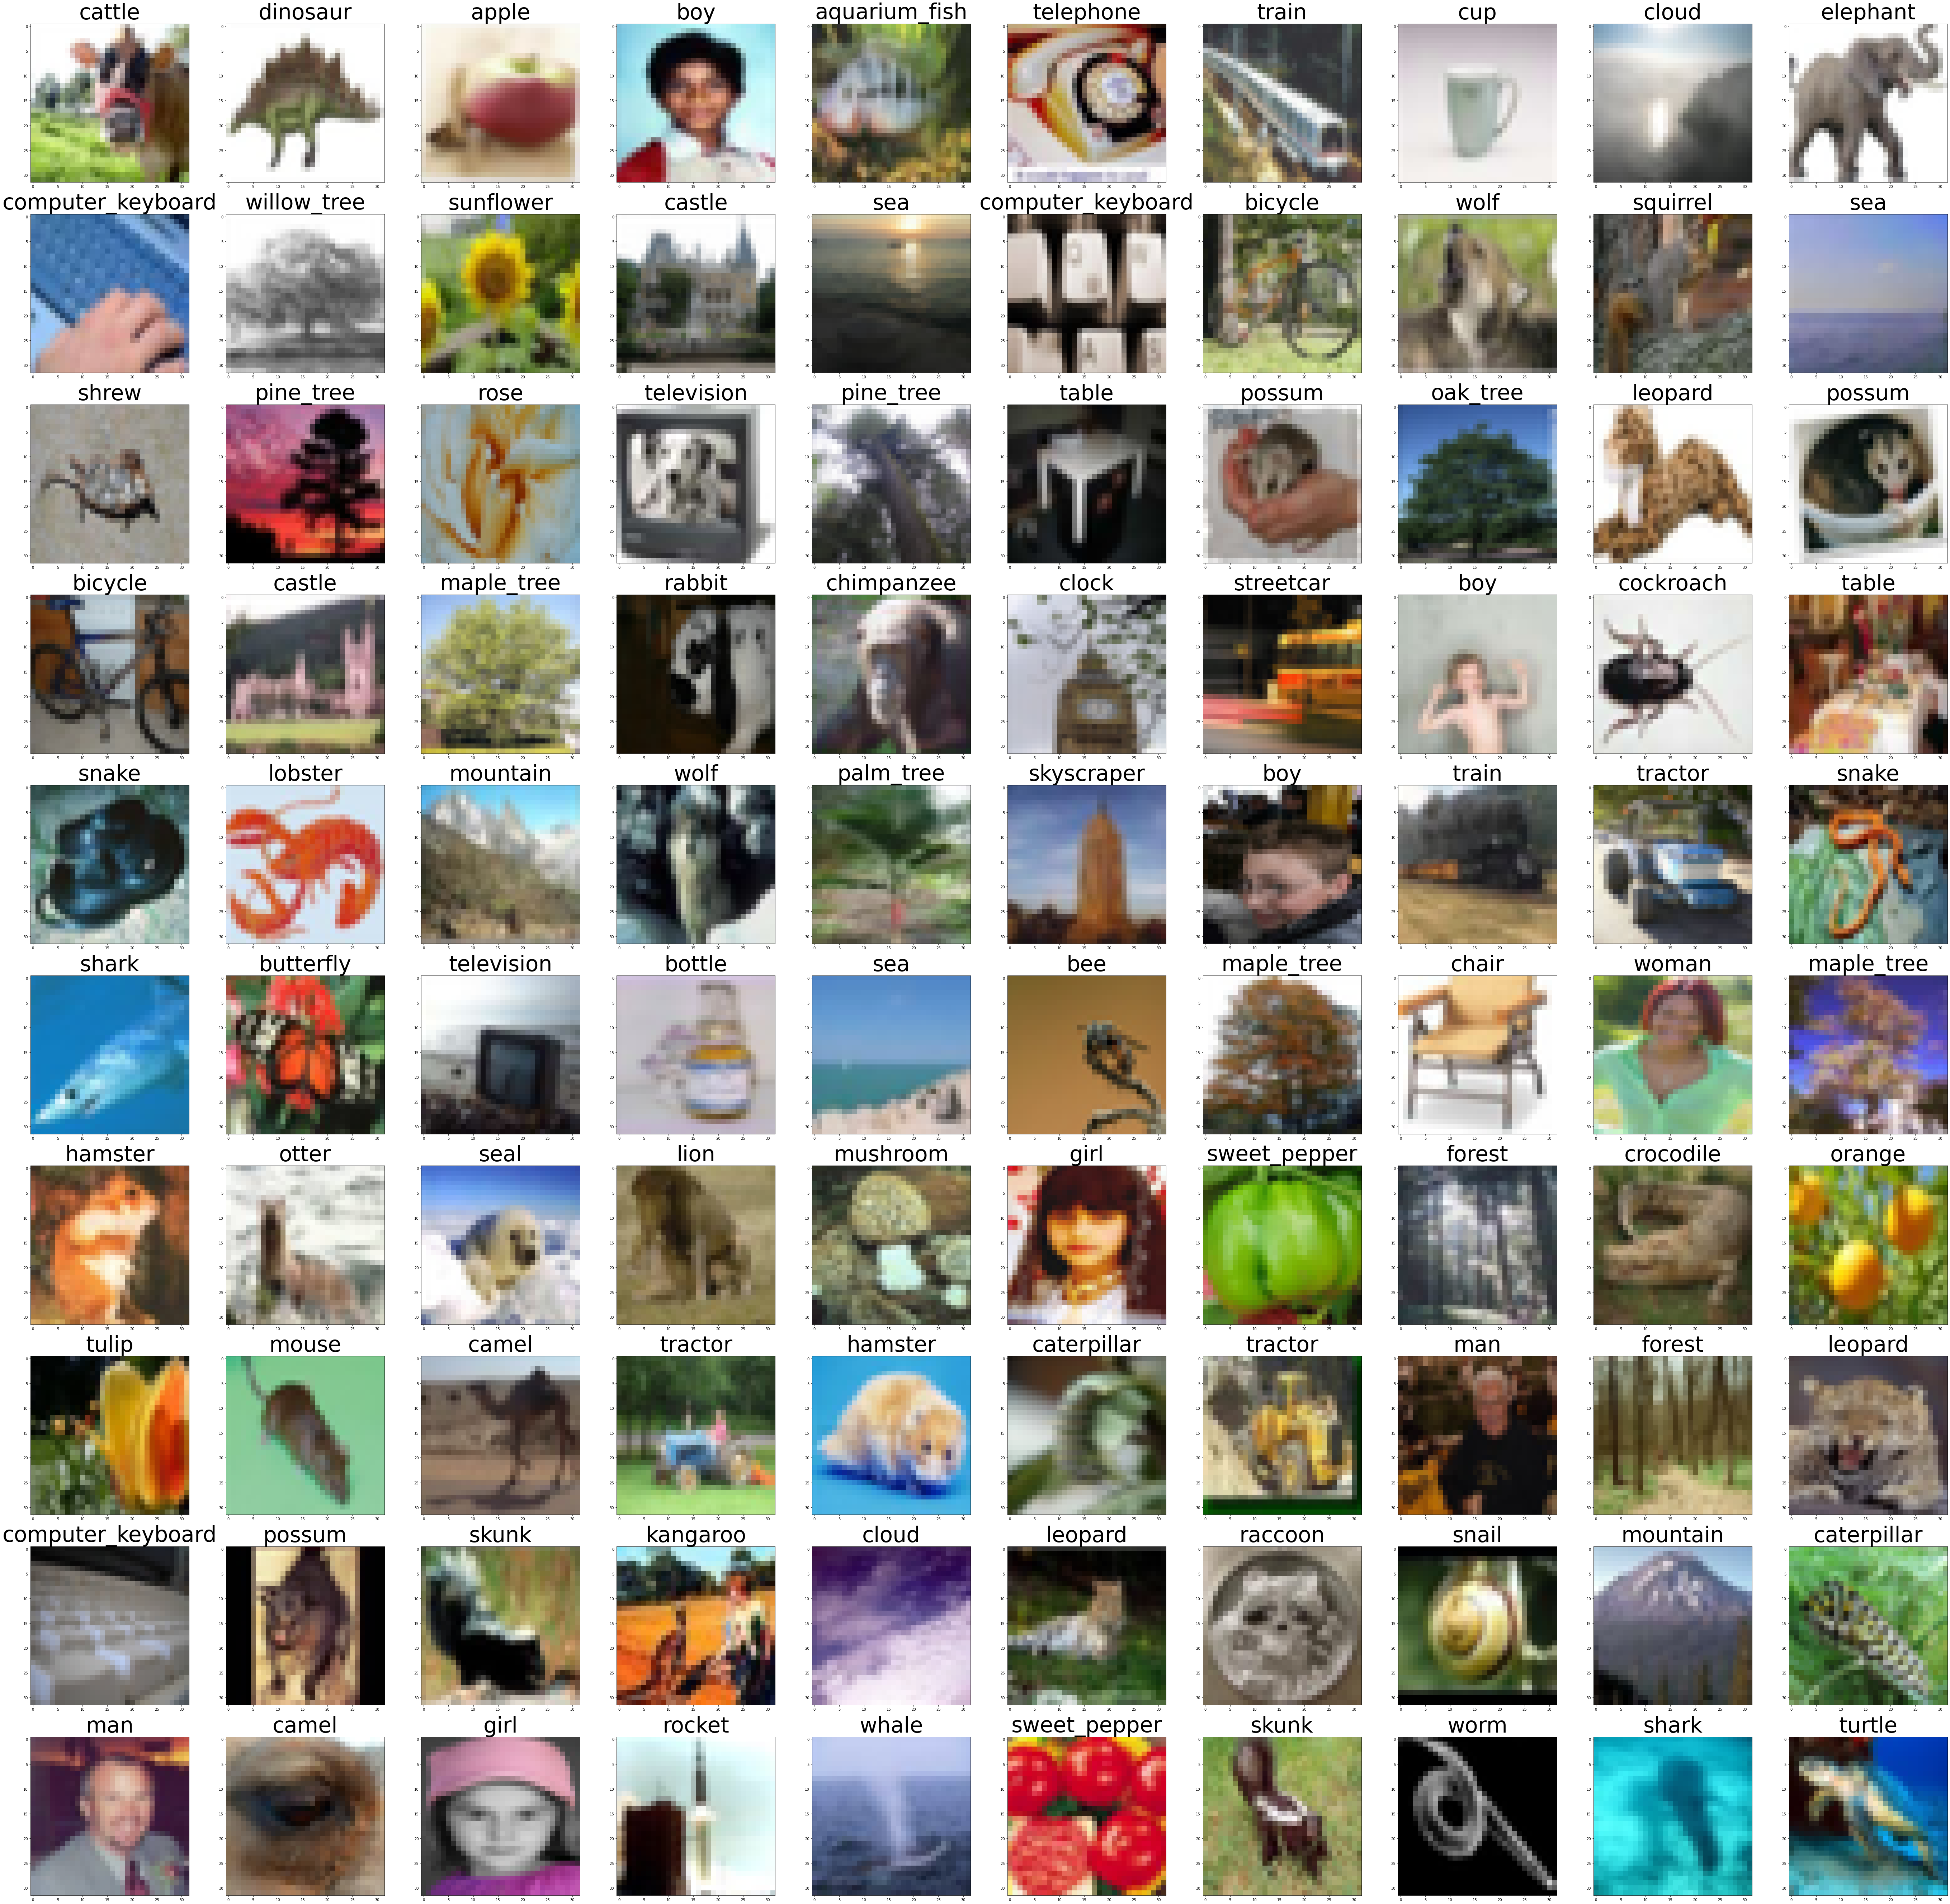

In [3]:
fig,ax=plt.subplots(10,10,figsize=(96,96))
ax=ax.ravel()
for i in range(0,100):
    image=X_train[i]
    label=int(y_train[i])
    ax[i].imshow(image)
    ax[i].set_title(labels[label],fontdict={'size':60})

# Aggumemting Data

In [4]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

# Normalizing Data
 <h3> Dividing it by 255 as pixel ranges from 0 to 255 and 255 is maximum value

In [5]:
# normalize data
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")

X_train/=255.0
X_test/=255.0

# One-hot encoding label

In [6]:
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)
print('One hot Encoded: ',y_train[0])

One hot Encoded:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


# Shape of Train and Test Data
 <h3> Shape is (32,32,3) as image is of size 32x32 and 3 RGB(Red-Green-Blue) Channels <h3>

In [7]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (50000, 32, 32, 3)
Shape of y_train:  (50000, 100)
Shape of X_test:  (10000, 32, 32, 3)
Shape of y_test:  (10000, 100)


# CNN Architecture

In [8]:
# model creation
model=Sequential()
model.add(Conv2D(100,(2,2), input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(80,(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(50,(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(100, activation='softmax'))

# Compiling Model And Gettin Model Summary
 - <b>categorical_crossentrophy<b> as loss as it is multiclass classification and will return a array with probability of all classes. 
 - <b>adam<b> is one of fameous optimizer . 
 - <b>metric<b> here we are using accuracy for evaluation as metric. 

In [9]:
#compile model
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

#model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 100)       1300      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 80)        32080     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 80)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 50)          16050     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 50)         0

# Training Model
- <b>Epochs: <b>It refers to the one cycle of all training data through neural network.
- <b>Batch_size: <b>It refers to the number of example after which weights should be modified.
- <b>EarlyStopping: <b>It lets the model stop training if a given paramter is not changing here it is accuracy and patient means consecutive times the change is not occuring.

In [10]:
# to train model

EPOCHS=50

Batch_size=32

callback=EarlyStopping(monitor='val_accuracy', mode='auto', verbose=1, patience=4)

history=model.fit(datagen.flow(X_train,y_train),
         batch_size=Batch_size,
         validation_data=datagen.flow(X_test,y_test),
         callbacks=callback,
         epochs=EPOCHS,
         verbose=1,
         shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 62s 39ms/step - loss: 3.9427 - accuracy: 0.0834 - val_loss: 3.5756 - val_accuracy: 0.1499
Epoch 2/50
1563/1563 [==============================] - 69s 44ms/step - loss: 3.4040 - accuracy: 0.1746 - val_loss: 3.3156 - val_accuracy: 0.1941
Epoch 3/50
1563/1563 [==============================] - 68s 43ms/step - loss: 3.1762 - accuracy: 0.2132 - val_loss: 3.1024 - val_accuracy: 0.2343
Epoch 4/50
1563/1563 [==============================] - 58s 37ms/step - loss: 3.0150 - accuracy: 0.2461 - val_loss: 2.9926 - val_accuracy: 0.2616
Epoch 5/50
1563/1563 [==============================] - 60s 39ms/step - loss: 2.8939 - accuracy: 0.2699 - val_loss: 2.9415 - val_accuracy: 0.2628
Epoch 6/50
1563/1563 [==============================] - 58s 37ms/step - loss: 2.8146 - accuracy: 0.2837 - val_loss: 2.8435 - val_accuracy: 0.2858
Epoch 7/50
1563/1563 [==============================] - 57s 36ms/step - loss: 2.7339 - accuracy: 0.3025 - val_loss: 2.8292 -

# Show Loss and Accuracy Plots

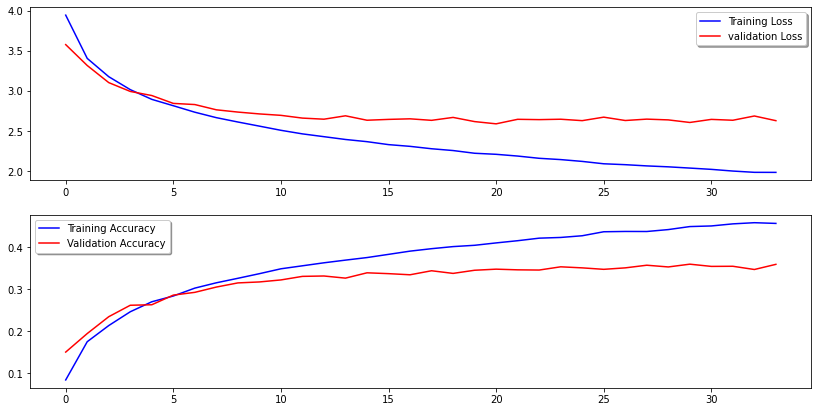

In [11]:
fig, ax = plt.subplots(2, 1,figsize=(14,7))

ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation Loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)


# Saving Trained Model

In [12]:
from keras.models import save_model,load_model
model.save("image_reco_cifar100")

INFO:tensorflow:Assets written to: image_reco_cifar100\assets


INFO:tensorflow:Assets written to: image_reco_cifar100\assets


# Saving Trained Weights

In [13]:
model.save_weights("model_weights_cifar100.h5")

# Making predictions on the images

In [14]:
from keras.models import model_from_json
import numpy as np

# load an image file to test

In [15]:

from keras.utils import load_img,img_to_array



# Loading Saved Model

In [16]:
model_loaded=load_model("image_reco_cifar100")

# Creating Image Detctor
- It will load image
- Convert it to numpy array
- Expand it's dimension
- As it is a sparse matrix of result get result with highest probability using argmax
- Also it return probability of prediction 

In [17]:
def image_predictor(img_path):
    img= load_img(img_path,target_size=(32,32))
    img_show=load_img(img_path)
    image_to_test= img_to_array(img)
    list_of_images= np.expand_dims(img,axis=0)
    results= model_loaded.predict(list_of_images)
    single_result= results[0]
    most_likely_class_index= int(np.argmax(single_result))
    class_likelihood= single_result[most_likely_class_index]
    class_label= labels[most_likely_class_index]
    return img_show,class_likelihood,class_label

1/1 [==============================] - 0s 6ms/step


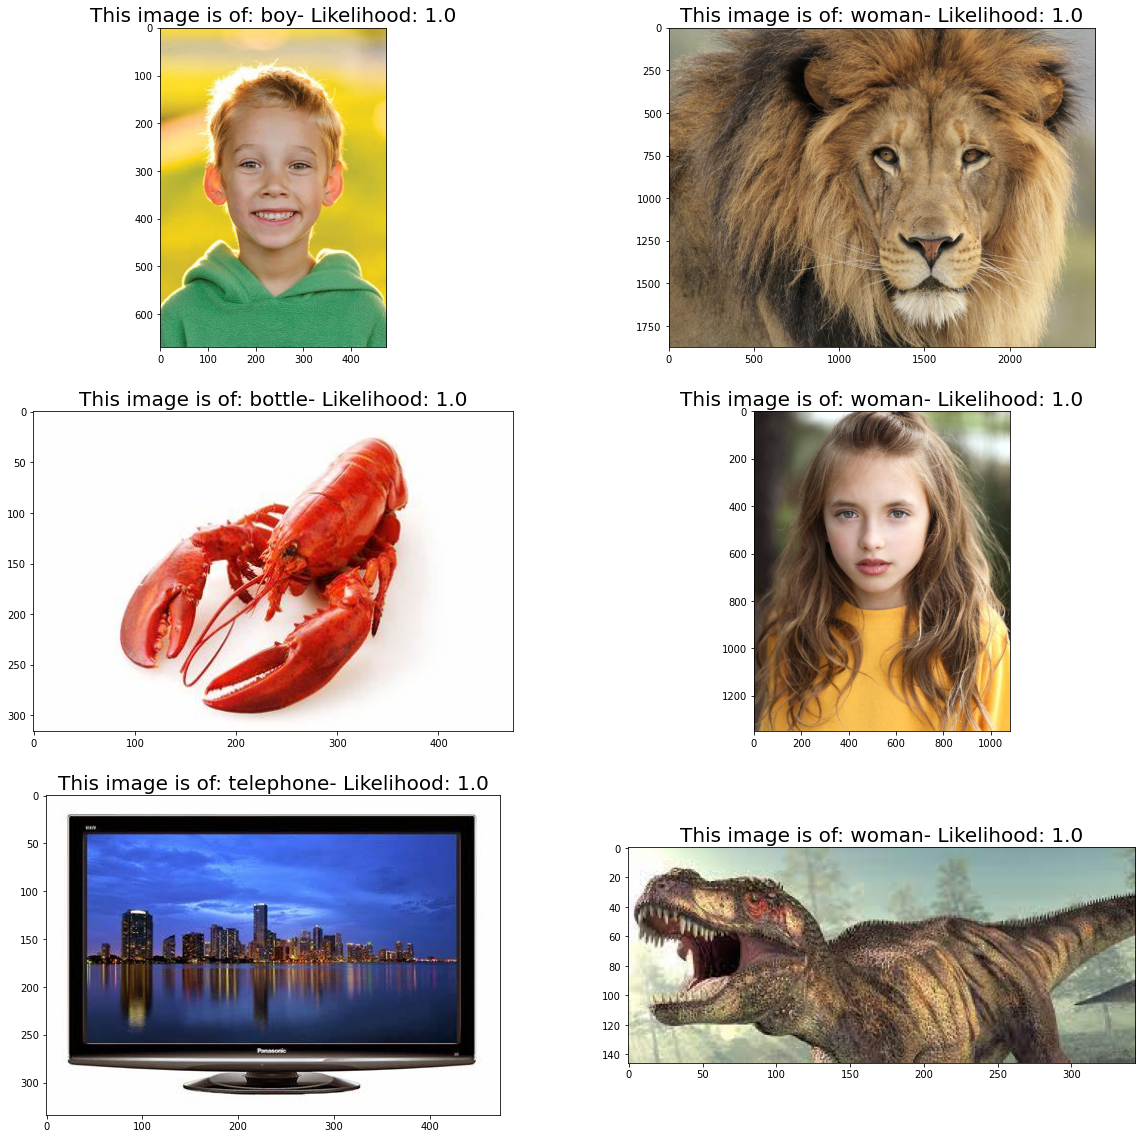

In [18]:
# Print the result
import matplotlib.pyplot as plt
list_image_to_test=['boy.jpg','lion.jpg','lobster.jpg','girl.jpg','tv.jpg','dinosaur.jpg']
fig,ax=plt.subplots(3,2,figsize=(20,20))
ax=ax.ravel()
for i in range(len(list_image_to_test)):
    img,class_likelihood,class_lable=image_predictor(list_image_to_test[i])
    ax[i].imshow(img)
    ax[i].set_title(f'This image is of: {class_lable}- Likelihood: {class_likelihood}',fontdict={'size':20})


# Conclusion
- We can see it classified televison,baby,lobster,sunflower
- Also it missclassifed girl as bottel,lion as orange